In [157]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import squarify
from webcolors import name_to_hex

# 0 - Import data set

In [76]:
main_df = pd.read_csv("../data/cleaned_data.csv") 

In [77]:
main_df.head(2)

,id,region,region_url,price,year,manufacturer,model,condition,cylinders,fuel,...,type,paint_color,description,state,lat,long,posting_date,post_day,post_month,post_year
0,7316814884,auburn,https://auburn.craigslist.org,33590,2014,gmc,sierra 1500 crew cab slt,good,8 cylinders,gas,...,pickup,white,Carvana is the safer way to buy a car During t...,al,32.59,-85.48,2021-05-04 17:31:18+00:00,4,5,2021
1,7316814758,auburn,https://auburn.craigslist.org,22590,2010,chevrolet,silverado 1500,good,8 cylinders,gas,...,pickup,blue,Carvana is the safer way to buy a car During t...,al,32.59,-85.48,2021-05-04 17:31:08+00:00,4,5,2021


# 1 - Basic questions

## 1.1 - What are the top five manufacturers?

In [78]:
top_5_manufacturers = main_df['manufacturer'].value_counts().head(5)

C:\Users\thebo\AppData\Local\Temp\ipykernel_44880\871441221.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=top_5_manufacturers.index, y=top_5_manufacturers.values, palette='viridis')


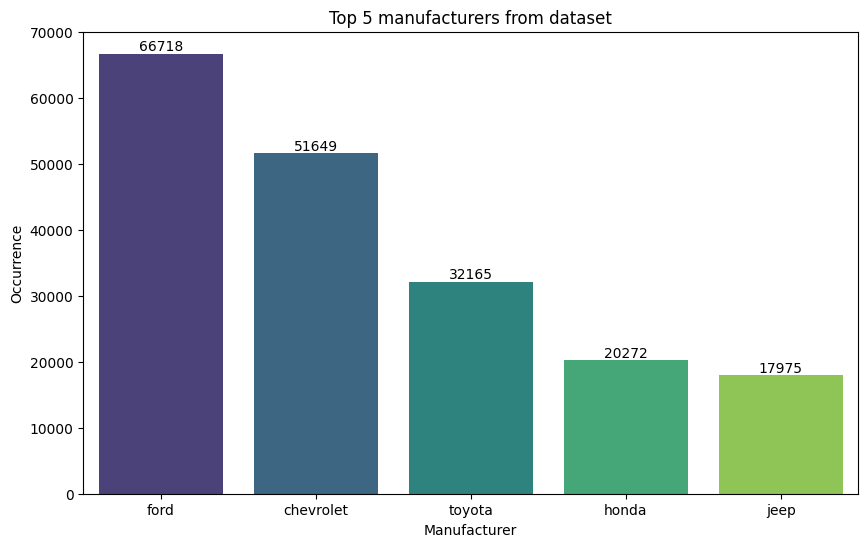

In [79]:
plt.figure(figsize=(10, 6))
# pal = sns.color_palette("Blues",n_colors=5)
# pal.reverse()
ax = sns.barplot(x=top_5_manufacturers.index, y=top_5_manufacturers.values, palette='viridis')
plt.title('Top 5 manufacturers from dataset')
plt.xlabel('Manufacturer')
plt.ylabel('Occurrence')

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 5),
                textcoords = 'offset points')

plt.show()

## 1.2 - What are the top 10 models?

In [80]:
top_models = main_df['model'].value_counts().head(10)

C:\Users\thebo\AppData\Local\Temp\ipykernel_44880\2684037656.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=top_models.index, y=top_models.values, palette='viridis')


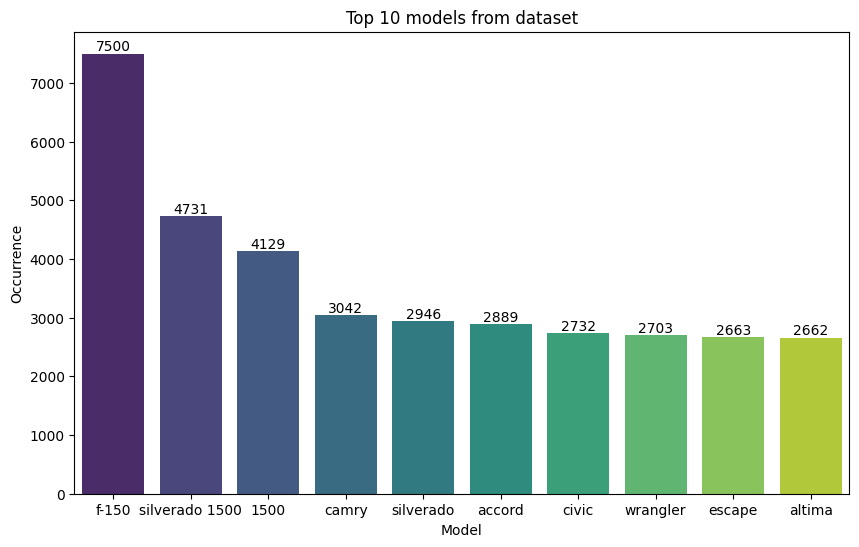

In [81]:
plt.figure(figsize=(10, 6))

ax = sns.barplot(x=top_models.index, y=top_models.values, palette='viridis')
plt.title('Top 10 models from dataset')
plt.xlabel('Model')
plt.ylabel('Occurrence')

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 5),
                textcoords = 'offset points')

plt.show()

## 1.2b - Top 10 models with manufacturers detail

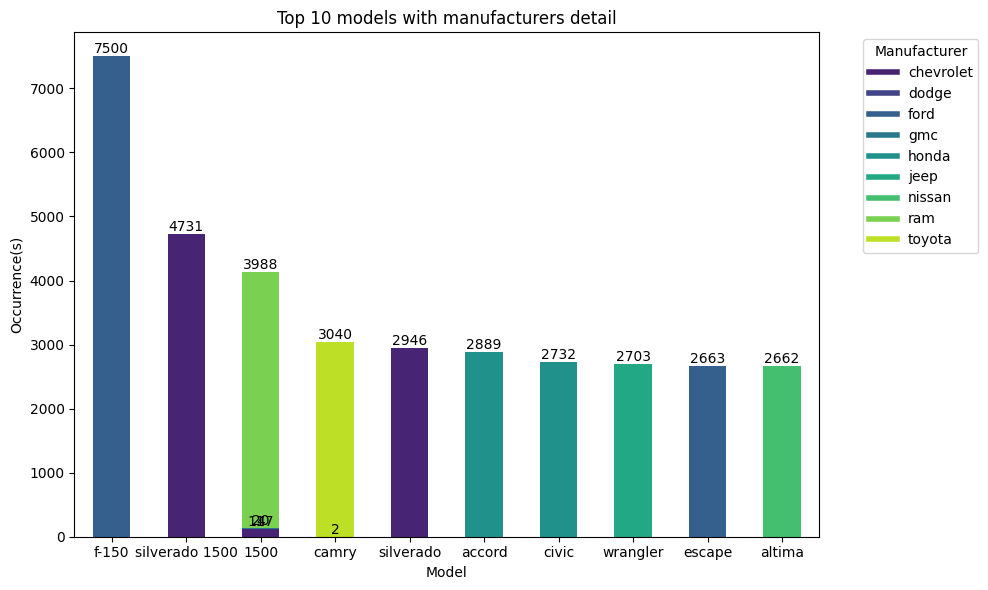

In [82]:
top_models = main_df['model'].value_counts().head(10)

top_10_df = main_df[main_df['model'].isin(top_models.index)][['manufacturer', 'model']]
top_10_df = top_10_df.groupby(['model', 'manufacturer']).size().reset_index(name='count')

pivot_df = top_10_df.pivot(index='model', columns='manufacturer', values='count')

#palette
constructeurs = pivot_df.columns
palette = sns.color_palette("viridis", len(constructeurs))
color_map = dict(zip(constructeurs, palette))

filtered_pivot_df = pivot_df.loc[pivot_df.sum(axis=1).sort_values(ascending=False).index]

plt.figure(figsize=(10, 6))
filtered_pivot_df.plot(kind='bar', stacked=True, color=[color_map[col] for col in filtered_pivot_df.columns], ax=plt.gca())
plt.title('Top 10 models with manufacturers detail')
plt.xlabel('Model')
plt.ylabel('Occurrence(s)')
plt.xticks(rotation=0)


for p in plt.gca().patches:
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy()
        if int(height) > 0 :
            plt.gca().annotate(f'{int(height)}', (x + width/2, y + height), ha='center', va='center', xytext = (0, 5), textcoords = 'offset points')


#Legend
handles = [plt.Line2D([0], [0], color=color_map[constructeur], lw=4) for constructeur in constructeurs]
plt.legend(handles, constructeurs, title='Manufacturer', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


Even if the bar chart is not the best, we can see a few things: 
- The most offered vehicle is the Ford F-150 (by far!)
- The model "1500" is mainly RAM but we can see some of the offers indicate "1500" for the Silverado 1500
- Speaking of that, the naming for this one is a bit complex apparently because we find it under 3 titles: Silverado 1500, Silverado and 1500...
- The most popular type of vehicle seems to be light-duty trucks (or pickups) with an obvious distance from the next following type (mid-size car)
- Also, two Camry are specified as "Nissan" (see below) where the equivalent model is "Altima"

In [83]:
camry_error = main_df[(main_df['model'] == 'camry') & (main_df['manufacturer'] != 'toyota')]
camry_error

,id,region,region_url,price,year,manufacturer,model,condition,cylinders,fuel,...,type,paint_color,description,state,lat,long,posting_date,post_day,post_month,post_year
214861,7316191642,hickory / lenoir,https://hickory.craigslist.org,17995,2017,nissan,camry,NaN,NaN,gas,...,NaN,NaN,2 to Choose From 2017 Red Camry Air Conditioni...,nc,35.6884,-81.3612,2021-05-03 14:48:18+00:00,3,5,2021
215039,7311592267,hickory / lenoir,https://hickory.craigslist.org,17995,2017,nissan,camry,NaN,NaN,gas,...,NaN,NaN,2 to Choose From 2017 Red Camry Air Conditioni...,nc,35.6884,-81.3612,2021-04-23 21:39:47+00:00,23,4,2021


## 1.3 - What are the most common vehicle types (SUV, sedan, truck, etc.)?

In [86]:
most_common_types = main_df["type"].value_counts().head(5)

C:\Users\thebo\AppData\Local\Temp\ipykernel_44880\1603169451.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=most_common_types.index, y=most_common_types.values, palette='viridis')


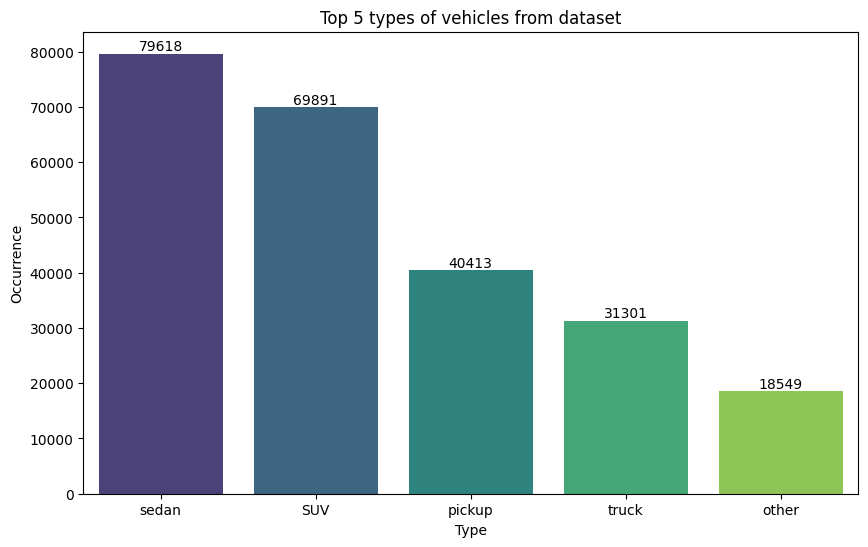

In [87]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=most_common_types.index, y=most_common_types.values, palette='viridis')
plt.title('Top 5 types of vehicles from dataset')
plt.xlabel('Type')
plt.ylabel('Occurrence')

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 5),
                textcoords = 'offset points')

Based on 1.2b, we could have said that the most popular used kind of vehicle was a pickup, with the Ford F-150 being its representative. However, it is not enough to beat the less individually popular but collectively strong sedans. 

In [92]:
top_sedans = main_df[(main_df['type'] == 'sedan')]['model'].value_counts().head(5)
top_sedans

model
camry      2247
accord     1900
altima     1765
civic      1640
corolla    1579
Name: count, dtype: int64

## 1.4 - What is the distribution of vehicle prices?

In [107]:
main_df["price"].nlargest(10)

286887    3736928711
320929    3736928711
82178     3024942282
231248    3024942282
166525    1410065407
137751    1234567890
26770     1111111111
208489     135008900
123738     123456789
174718     123456789
Name: price, dtype: int64

In [103]:
display(main_df.loc[main_df['price'] == main_df["price"].max()])

,id,region,region_url,price,year,manufacturer,model,condition,cylinders,fuel,...,type,paint_color,description,state,lat,long,posting_date,post_day,post_month,post_year
286887,7308056031,eugene,https://eugene.craigslist.org,3736928711,2007,toyota,tundra,excellent,8 cylinders,gas,...,pickup,silver,Selling my 2007 Toyota Tundra SR5 four wheel d...,or,44.066092,-124.037561,2021-04-17 01:16:12+00:00,17,4,2021
320929,7302445002,knoxville,https://knoxville.craigslist.org,3736928711,1999,toyota,4runner,fair,6 cylinders,gas,...,NaN,green,"99 four runner 211,000 miles runs great 4x4 wo...",tn,36.081000,-83.567300,2021-04-06 03:15:48+00:00,6,4,2021


In [ ]:
aa = main_df.loc[main_df["type"] == "sedan"]["price"].nlargest(10)
main_df[(main_df['price'].isin(aa)) & (main_df["type"] == "sedan")].sort_values(by='price', ascending=False).head(4)



,id,region,region_url,price,year,manufacturer,model,condition,cylinders,fuel,...,type,paint_color,description,state,lat,long,posting_date,post_day,post_month,post_year
123738,7314339777,spokane / coeur d'alene,https://spokane.craigslist.org,123456789,1999,buick,regal,like new,6 cylinders,gas,...,sedan,white,This supercharged regal is no longer charged s...,id,47.695200,-117.365800,2021-04-29 15:48:15+00:00,29,4,2021
174718,7315524207,ann arbor,https://annarbor.craigslist.org,123456789,2015,chevrolet,cruze,like new,NaN,gas,...,sedan,red,PLEASE CALL FOR PRICING ON THE LOT AND FOR S...,mi,41.381500,-83.650700,2021-05-01 21:44:14+00:00,1,5,2021
62039,7302895209,ventura county,https://ventura.craigslist.org,2000000,2002,saturn,l-series l200 4dr sedan,good,4 cylinders,gas,...,sedan,green,No longer need runs and drives great. This ca...,ca,34.236498,-119.039074,2021-04-06 23:40:31+00:00,6,4,2021
163119,7316796847,baltimore,https://baltimore.craigslist.org,209995,2020,mercedes-benz,mercedes-maybach s-class,NaN,12 cylinders,gas,...,sedan,black,*** This 2020 Mercedes-Benz Mercedes-Maybach S...,md,39.456700,-76.969600,2021-05-04 17:04:04+00:00,4,5,2021


C:\Users\thebo\AppData\Local\Temp\ipykernel_44880\1524567099.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='type', y='price', data=df_filtered, palette='coolwarm')


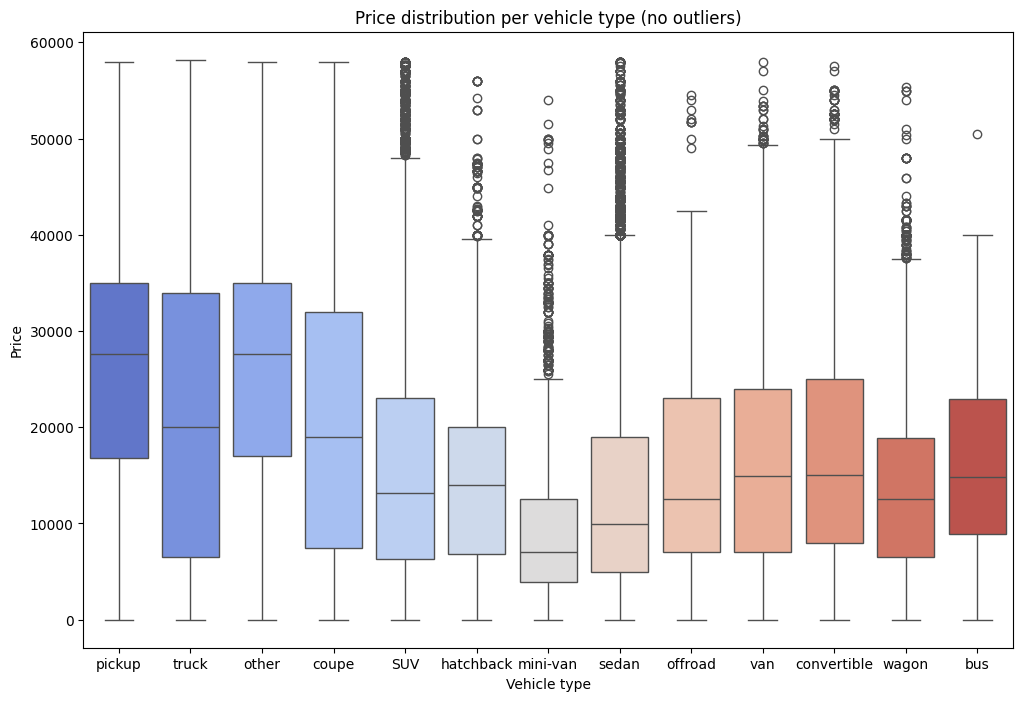

In [ ]:
Q1 = main_df['price'].quantile(0.25)
Q3 = main_df['price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
#IQR method to deal with outliers (cf. upper)

df_filtered = main_df[(main_df['price'] >= lower_bound) & (main_df['price'] <= upper_bound)]

plt.figure(figsize=(12, 8))
sns.boxplot(x='type', y='price', data=df_filtered, palette='coolwarm')
plt.title('Price distribution per vehicle type (no outliers)')
plt.xlabel('Vehicle type')
plt.ylabel('Price')
plt.xticks(rotation=0)
plt.show()

In [118]:
round(main_df.price.median())

13997

In [119]:
round(main_df.price.mean())

64788

As we saw, there are some serious outliers in the price data (e.g., $3.7 billions for a Toyota Tundra/4 Runner...). I do not know if the data are corrupted or if the prices were set by the users this way but we will consider them as outliers only (not *errors*). Given this, we cannot rely on the mean average price without excluding these data points. However, based on the median, the average price for a used car seems to be around $14k.

- Pickups and 'others' have the higher prices
- Minivan is the least expensive type of vehicle
- Sedans are mostly priced between $5k-20k which seems coherent with the most expensive one being a mercedes-maybach s-class ($210k)

## 1.5 - Years of manufacture

What is the distribution of vehicle manufacturing years?
What are the newest and oldest models in the dataset?

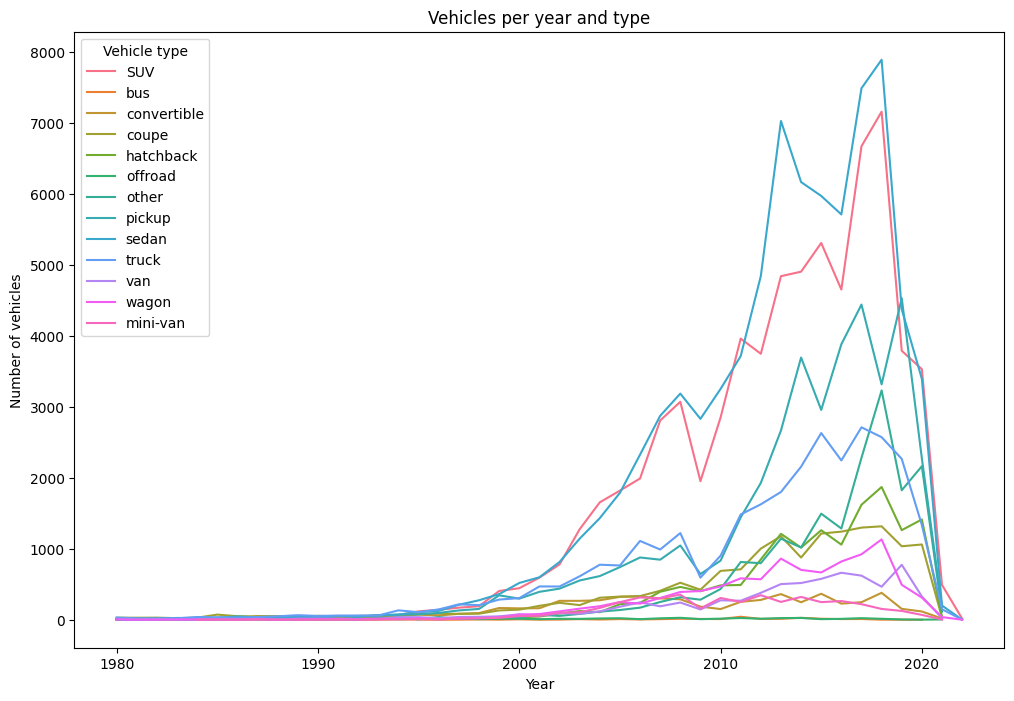

In [141]:
main_df_filtered = main_df[main_df['year'] >= 1980]
vehicle_counts = main_df_filtered.groupby(['year', 'type']).size().reset_index(name='count')


#vehicle_counts = main_df.groupby(['year', 'type']).size().reset_index(name='count')

plt.figure(figsize=(12, 8))
sns.lineplot(x='year', y='count', hue='type', data=vehicle_counts)
plt.title('Vehicles per year and type')
plt.xlabel('Year')
plt.ylabel('Number of vehicles')
plt.legend(title='Vehicle type')
plt.show()

- SUV appear in the 2000 with a constant growth until 2018 (which is logical as it is used cars data from few years ago, newest vehicules were not in the second market yet)
- There is a significant dip around 2008

## 1.6 - Energy type

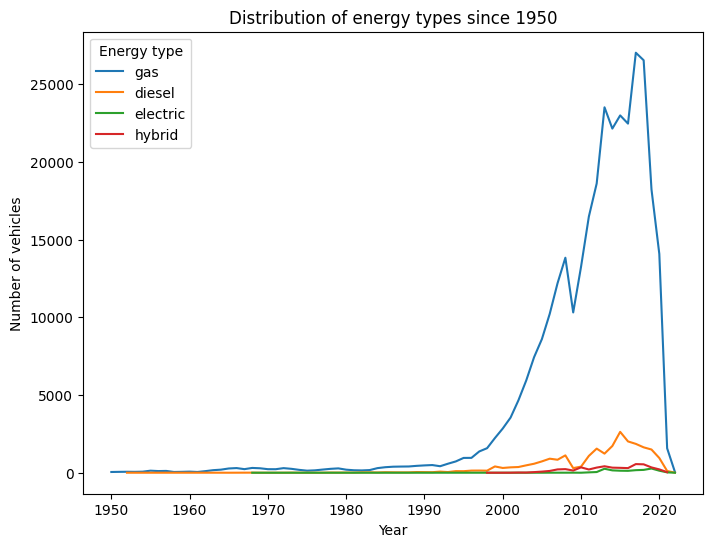

In [147]:
main_df_filtered = main_df[(main_df['year'] >= 1950)&(main_df["fuel"] != "other")]

energy_counts = main_df_filtered.groupby(['year', 'fuel']).size().reset_index(name='count')

plt.figure(figsize=(8, 6))
sns.lineplot(x='year', y='count', hue='fuel', data=energy_counts)
plt.title('Distribution of energy types since 1950')
plt.xlabel('Year')
plt.ylabel('Number of vehicles')
plt.legend(title='Energy type')
plt.show()


- Gas is by far the most represented type of energy
- Diesel shows a growth between 2000 and 2015 (might be linked to the Dieselgate)
- Electric and hybrid vehicles are gaining market shares but were mostly anecdotal at the time of the data collection

## 1.7 - Transmission

In [148]:
transmission = main_df['transmission'].value_counts()

C:\Users\thebo\AppData\Local\Temp\ipykernel_44880\1034543166.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=transmission.index, y=transmission.values, palette='viridis')


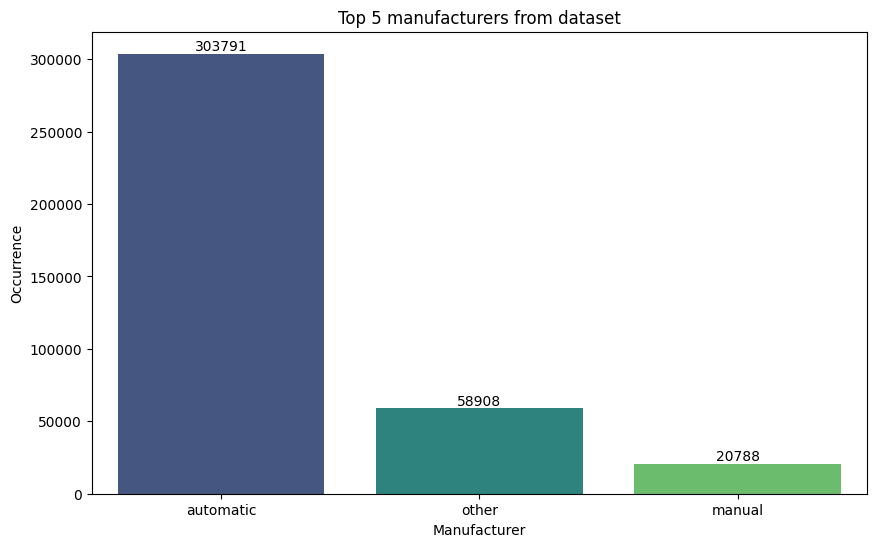

In [149]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=transmission.index, y=transmission.values, palette='viridis')
plt.title('Top 5 manufacturers from dataset')
plt.xlabel('Manufacturer')
plt.ylabel('Occurrence')

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 5),
                textcoords = 'offset points')

plt.show()

As this data is from the USA, this simple chart illustrates the well-known reality of transmission preferences. Automatic gearboxes are more than 10x more popular than the manual ones.

## 1.8 - Paint colors

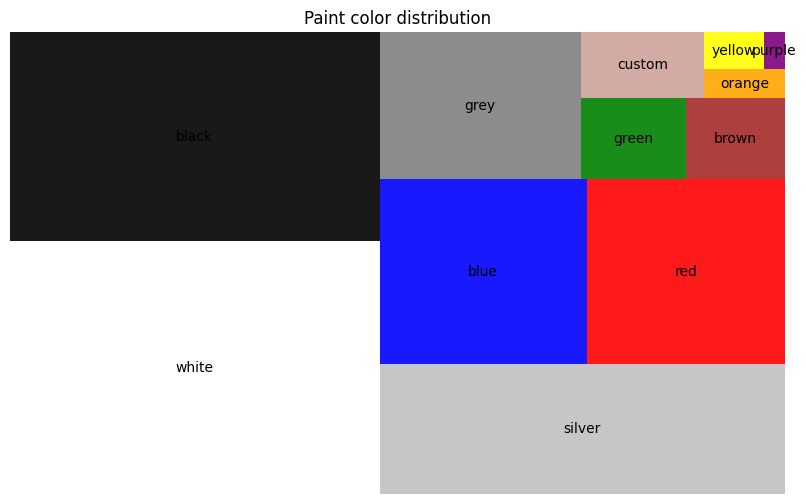

In [166]:
def get_color(color_name):
    try:
        return name_to_hex(color_name)
    except ValueError:
        return '#CDA29B'  

color_counts = main_df['paint_color'].value_counts()
colors = [get_color(color) for color in color_counts.index]

plt.figure(figsize=(10, 6))
squarify.plot(sizes=color_counts.values, label=color_counts.index, color=colors, alpha=0.9)
plt.title('Paint color distribution')
plt.axis('off')
plt.show()


# 2 - Correlation Questions

## 2.1 - What is the correlation between vehicle prices and other variables such as manufacturing year, mileage, and engine size (cylinders)? -> _Heatmap!!_

In [84]:
#Code

**Answer:**